In [1]:
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
import seaborn as sns
import sklearn.preprocessing
from math import sqrt
import wrangle
import env

from sklearn.metrics import classification_report, mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LogisticRegression, LinearRegression, LassoLars, TweedieRegressor, Ridge

from sklearn.feature_selection import SelectKBest, f_regression, RFE

from sklearn.preprocessing import PolynomialFeatures


In [2]:
train, validate, test = wrangle.wrangle_zillow()
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt,fips
29975,3,2.0,1238,6969,237037,1954,6037
22486,4,3.0,3833,9964,287413,2007,6037
18433,4,2.0,1304,6000,66419,1959,6059
6445,4,2.0,1620,9992,157617,1957,6037
17421,4,2.0,1963,11049,499310,1961,6037
...,...,...,...,...,...,...,...
3076,3,2.0,1737,8901,407191,1968,6059
26764,3,2.0,1300,7745,268568,1954,6037
22519,5,4.5,3728,3960,212968,1962,6059
9386,3,2.0,1337,6150,62699,1950,6037


In [3]:
# splits our training set into x and y values to run in our algorithms
X_train = train.drop(columns=['taxvaluedollarcnt', 'yearbuilt', 'fips'])
y_train = train['taxvaluedollarcnt']

# splits our validate set into x and y values to run in our algorithms
X_validate = validate.drop(columns=['taxvaluedollarcnt', 'yearbuilt', 'fips'])
y_validate = validate['taxvaluedollarcnt']

# splits our test set into x and y values to run in our algorithms
X_test = test.drop(columns=['taxvaluedollarcnt', 'yearbuilt', 'fips'])
y_test = test['taxvaluedollarcnt']

regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [4]:
X_train.shape, y_train.shape, train.shape

((24940, 4), (24940,), (24940, 7))

In [5]:
y_train['yhat_baseline'] = y_train.mean()
y_train.head(3)

29975    237037.0
22486    287413.0
18433     66419.0
Name: taxvaluedollarcnt, dtype: float64

In [6]:
# generate parameters, i.e. create model
ols_model = LinearRegression().fit(train[['lotsizesquarefeet']], train.taxvaluedollarcnt)

# compute predictions and add to original dataframe
train['yhat'] = ols_model.predict(train[['lotsizesquarefeet']])

train.head(3)


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt,fips,yhat
29975,3,2.0,1238,6969,237037,1954,6037,524259.077147
22486,4,3.0,3833,9964,287413,2007,6037,525452.615680
18433,4,2.0,1304,6000,66419,1959,6059,523872.920606


In [7]:
taxes = train.taxvaluedollarcnt
lot_size = train.lotsizesquarefeet


In [8]:
y_pred = regr.predict(X_train)


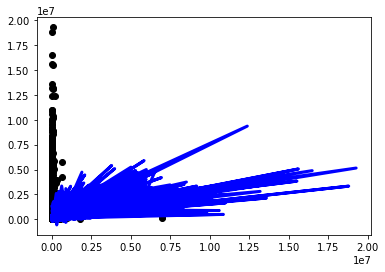

In [9]:
plt.scatter(lot_size, taxes, color="black")
plt.plot(taxes, y_pred, color="blue", linewidth=3)

In [10]:
# compute residuals
train['residual'] = train['yhat'] - train['taxvaluedollarcnt']
train['residual_baseline'] = y_train['yhat_baseline'] - train['taxvaluedollarcnt']
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt,fips,yhat,residual,residual_baseline
29975,3,2.0,1238,6969,237037,1954,6037,524259.077147,287222.077147,288774.114595
22486,4,3.0,3833,9964,287413,2007,6037,525452.615680,238039.615680,238398.114595
18433,4,2.0,1304,6000,66419,1959,6059,523872.920606,457453.920606,459392.114595
6445,4,2.0,1620,9992,157617,1957,6037,525463.773970,367846.773970,368194.114595
17421,4,2.0,1963,11049,499310,1961,6037,525884.999423,26574.999423,26501.114595


<AxesSubplot:xlabel='residual_baseline', ylabel='residual'>

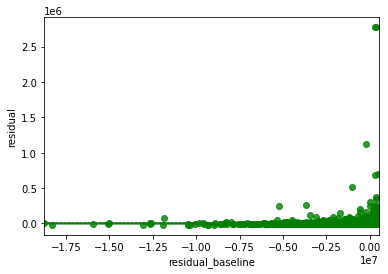

In [13]:
sns.residplot(x=train['residual_baseline'], y=train['residual'], lowess=True, color="g")


In [ ]:
one_bath = train[train.bathroomcnt == 1].taxvaluedollarcnt
two_bed = train[train.bedroomcnt == 2].taxvaluedollarcnt

In [ ]:
one_bath.shape, one_bath.hist()

In [ ]:
# generate parameters, i.e. create model
ols_model = LinearRegression().fit(train[['bathroomcnt']], train.taxvaluedollarcnt)

# compute predictions and add to original dataframe
train['yhat'] = ols_model.predict(train[['lotsizesquarefeet']])

train.head(3)
